In [83]:
#IMPORTING libraries to perform task

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [84]:
data = pd.read_csv('disney_plus_titles.csv')

In [85]:
type(data)

pandas.core.frame.DataFrame

In [86]:
data.info

<bound method DataFrame.info of      show_id     type                           title  \
0         s1    Movie                   A Spark Story   
1         s2    Movie                  Spooky Buddies   
2         s3    Movie          The Fault in Our Stars   
3         s4  TV Show                 Dog: Impossible   
4         s5  TV Show  Spidey And His Amazing Friends   
...      ...      ...                             ...   
1363   s1364    Movie          The Sword in the Stone   
1364   s1365    Movie                 Those Calloways   
1365   s1366  TV Show            Disney Kirby Buckets   
1366   s1367  TV Show                  Disney Mech-X4   
1367   s1368  TV Show              Imagination Movers   

                        director  \
0     Jason Sterman, Leanne Dare   
1                   Robert Vince   
2                     Josh Boone   
3                            NaN   
4                            NaN   
...                          ...   
1363         Wolfgang Reitherma

In [87]:
description = data.describe()
print(description)

       release_year
count   1368.000000
mean    2002.348684
std       22.127559
min     1928.000000
25%     1998.000000
50%     2011.000000
75%     2018.000000
max     2021.000000


In [88]:
#isnull() returns a boolean mask indicating whether each element in the DataFrame is null or not.

data.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [89]:
#fillna: replaces the NULL values with a specified value

data2 = data.fillna(value=0)
data2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",0,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,0,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,0,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,0,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,0,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,0,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [90]:
import numpy as np
from scipy import stats

In [91]:
data2.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [92]:
data.head(21)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
5,s6,TV Show,Star Wars: Visions,NaN,NaN,NaN,"September 22, 2021",2021,TV-PG,1 Season,"Action-Adventure, Animation, Anime",An animated anthology celebrating Star Wars th...
6,s7,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,"September 17, 2021",2009,PG,106 min,"Comedy, Romance, Romantic Comedy",Becky writes a personal finance column en rout...
7,s8,Movie,Descendants: Royal Wedding,Salvador Simó,"Dove Cameron, Sofia Carson, Booboo Stewart, Mi...",NaN,"September 17, 2021",2021,TV-G,22 min,"Animation, Fantasy, Musical",Mal and Ben’s wedding is finally here!
8,s9,Movie,Disney's Broadway Hits at London's Royal Alber...,Jay Hatcher,"John Barrowman, Ashley Brown, Merle Dandridge,...",NaN,"September 17, 2021",2016,TV-G,116 min,Concert Film,Experience the magic of Disney on Broadway in ...
9,s10,Movie,Flooded Tombs of the Nile,Katie Bauer Murdock,Devin E. Haqq,NaN,"September 17, 2021",2021,TV-PG,44 min,Documentary,Archaeologists dive into a pyramid flooded by ...


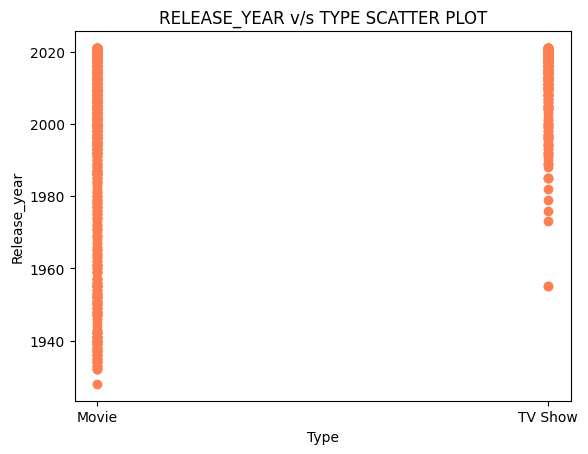

In [93]:
#Scatter plot
plt.scatter(data['type'], data['release_year'], color='coral') 

#Title to the plot
plt.title("RELEASE_YEAR v/s TYPE SCATTER PLOT")

#Adding Label
plt.xlabel('Type')
plt.ylabel('Release_year')

#Display the Chart
plt.show()

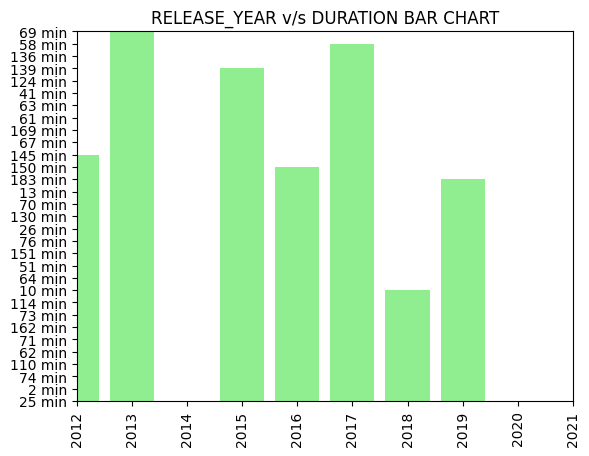

In [94]:
#Bar chart
plt.bar(data['release_year'], data ['duration'], color='lightgreen')

#Title to the plot
plt.title("RELEASE_YEAR v/s DURATION BAR CHART")

#Adding Label
plt.xlabel('')
plt.ylabel('')

plt.xlim(2012,2021)
plt.ylim(120,150)
plt.xticks(rotation=90)

#Display the plot
plt.show()

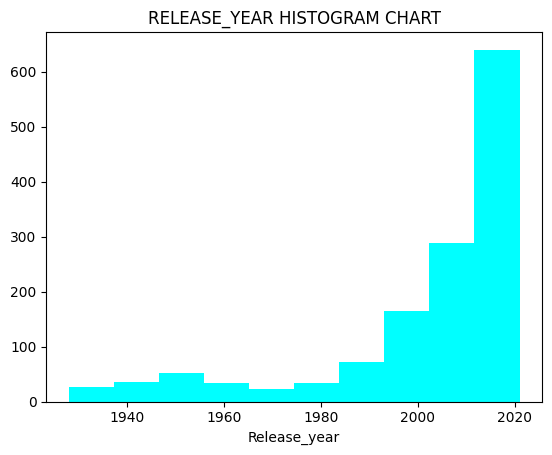

In [95]:
#Histogram
plt.hist(data['release_year'], color='cyan')

#Title to the plot
plt.title("RELEASE_YEAR HISTOGRAM CHART")

#Adding Label
plt.xlabel("Release_year")

#Display the plot
plt.show()



In [96]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from datetime import datetime

In [97]:
data.shape

(1368, 12)

In [98]:
columns_to_remove = ['cast','director']
data = data.drop(columns=columns_to_remove)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   country       1193 non-null   object
 4   date_added    1365 non-null   object
 5   release_year  1368 non-null   int64 
 6   rating        1366 non-null   object
 7   duration      1368 non-null   object
 8   listed_in     1368 non-null   object
 9   description   1368 non-null   object
dtypes: int64(1), object(9)
memory usage: 107.0+ KB


In [99]:
data['date_added'] = pd.to_datetime(data['date_added'])
data.head(5)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,"United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


<function matplotlib.pyplot.show(close=None, block=None)>

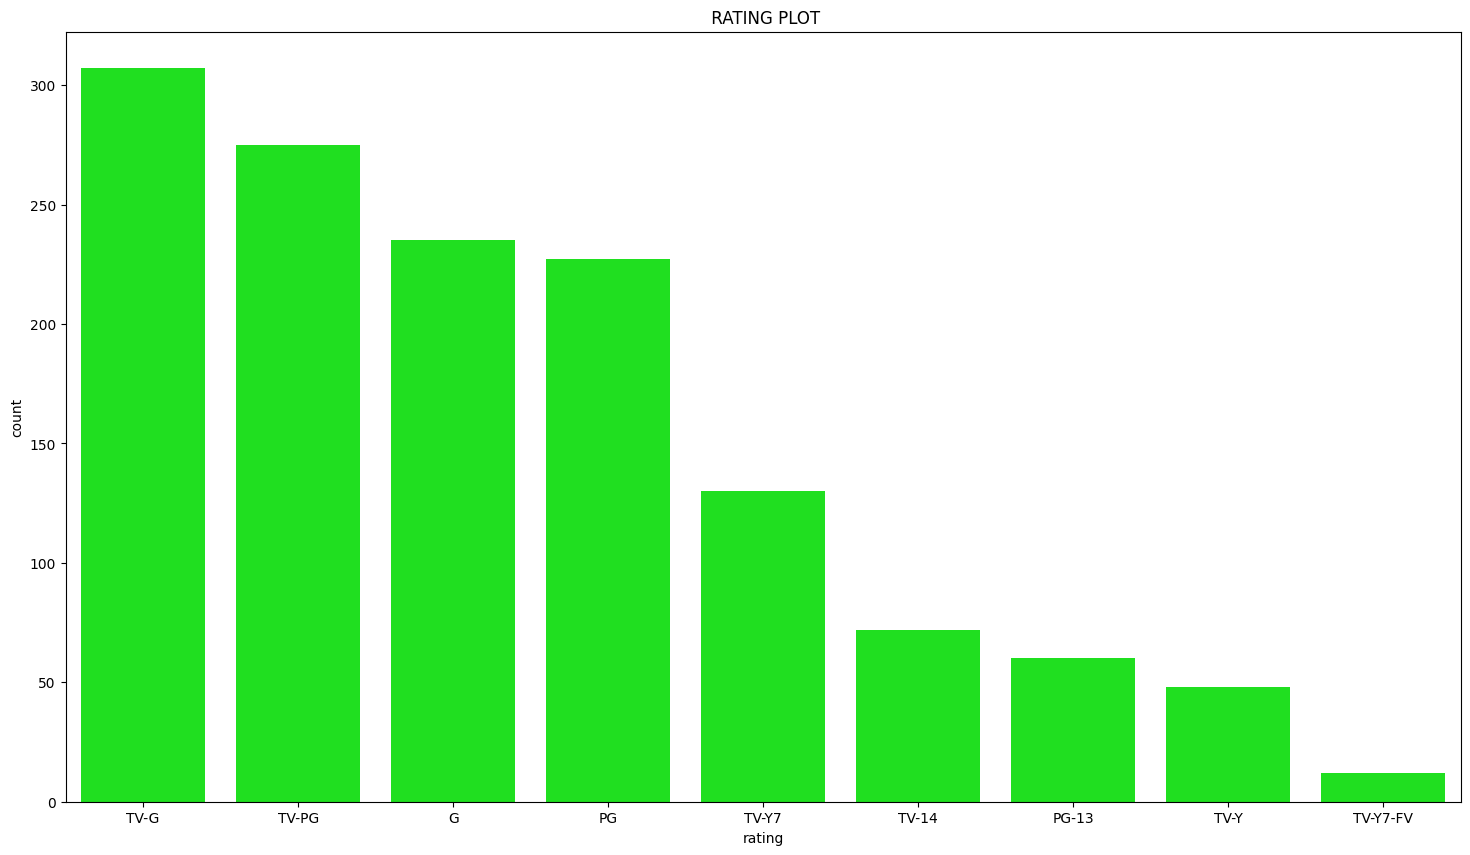

In [100]:
plt.figure(figsize = (18,10))
sns.countplot(x='rating',data=data,color='Lime',order=data['rating'].value_counts().index)
plt.xticks(rotation=0)
plt.title(" RATING PLOT")

plt.show

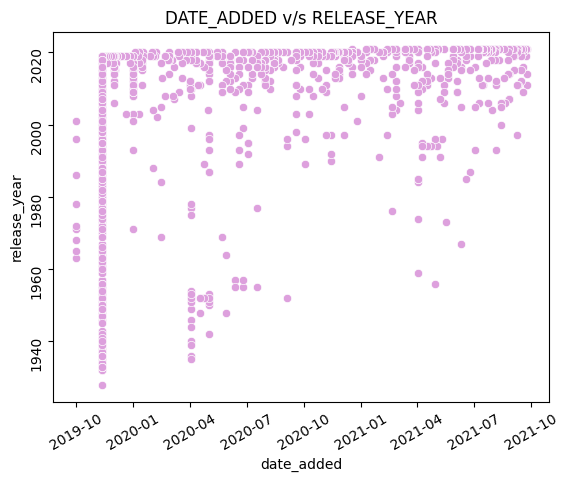

In [101]:
#Count the number of minutes user spending on Disney plus

sns.scatterplot(data=data , x='date_added', y='release_year',color='plum')

plt.xticks(rotation=30)
plt.yticks(rotation=90)
plt.title("DATE_ADDED v/s RELEASE_YEAR")

plt.show()

array([[<Axes: title={'center': 'date_added'}>,
        <Axes: title={'center': 'release_year'}>]], dtype=object)

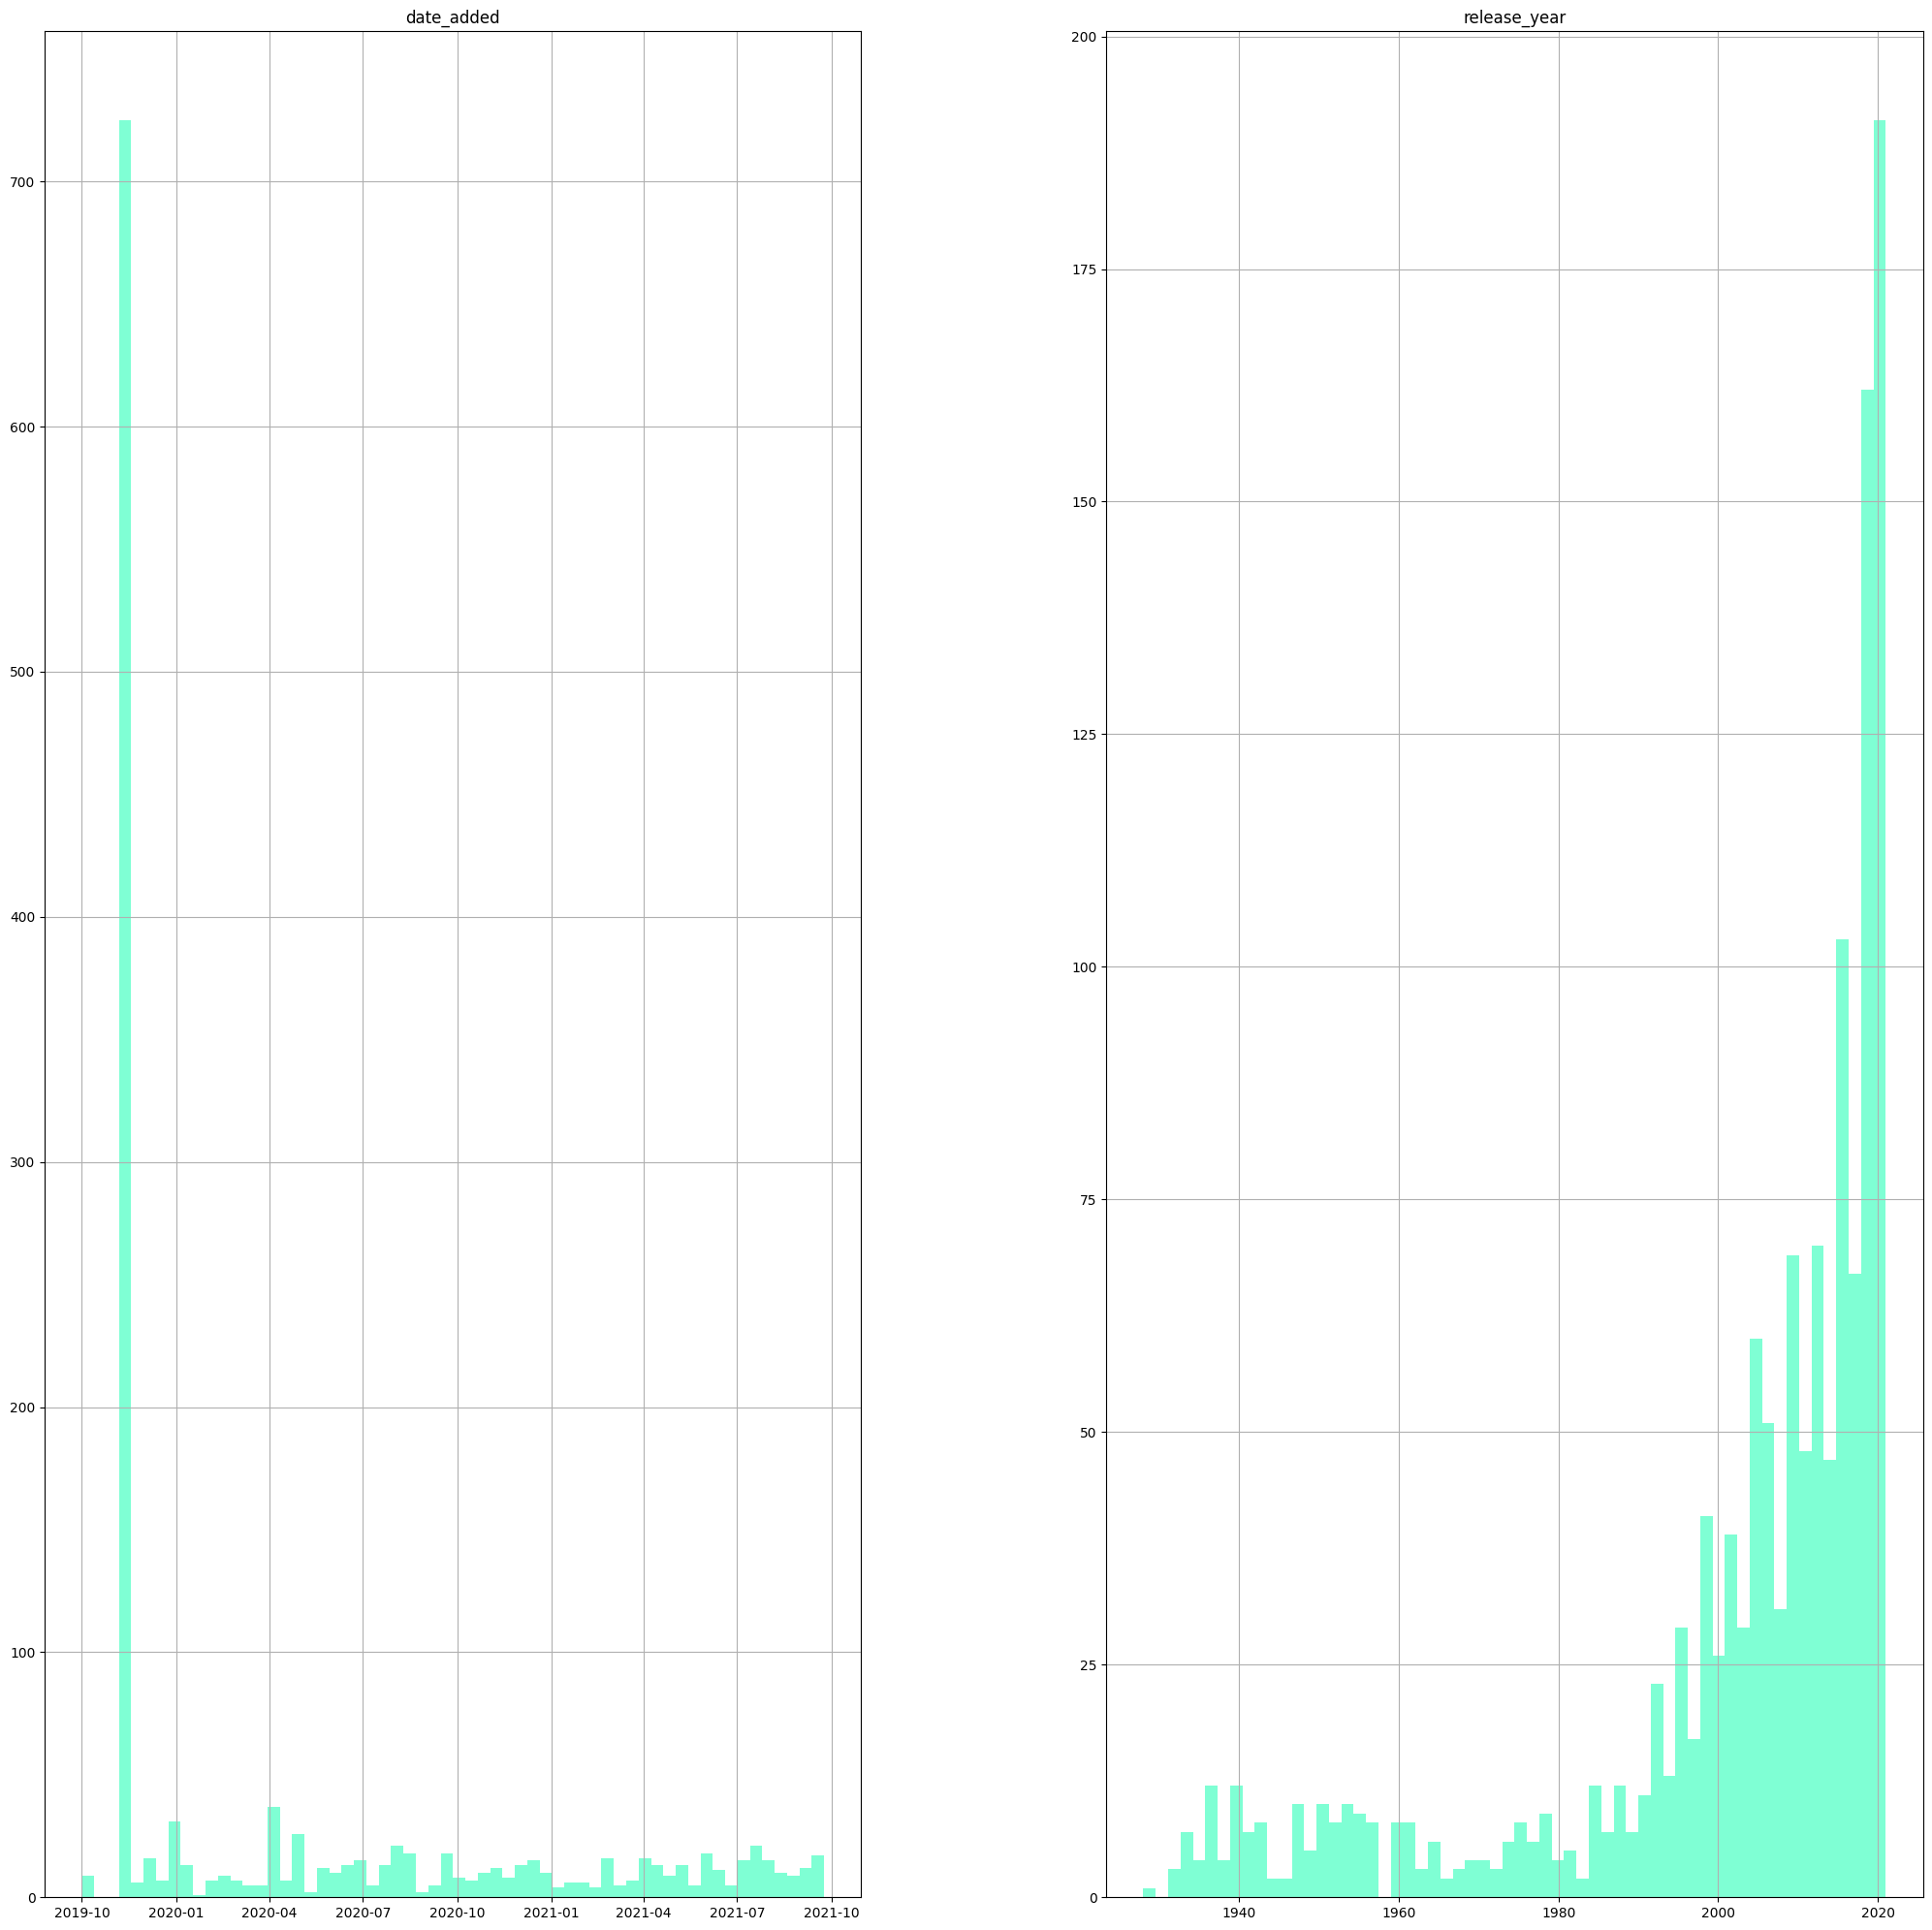

In [102]:
#Ploting a Histogram for all columns

data.hist(bins=60, grid=True, figsize = (25,25), color='Aquamarine')

In [103]:
data.describe()

,date_added,release_year
count,1365,1368.000000
mean,2020-04-18 08:04:13.186812928,2002.348684
min,2019-10-01 00:00:00,1928.000000
25%,2019-11-12 00:00:00,1998.000000
50%,2019-11-12 00:00:00,2011.000000
75%,2020-09-04 00:00:00,2018.000000
max,2021-09-24 00:00:00,2021.000000
std,NaN,22.127559


In [104]:
question = ["1. What is the distribution of the release years for Disney Plus content?",
            "2. How is the content distributed between movies and TV shows?",
            "3. What are the most common ratings for Disney Plus content?",
            "4. What is the trend in content additions over time?",
            "5. How has the number of titles released each year changed over time?"]
question

['1. What is the distribution of the release years for Disney Plus content?',
 '2. How is the content distributed between movies and TV shows?',
 '3. What are the most common ratings for Disney Plus content?',
 '4. What is the trend in content additions over time?',
 '5. How has the number of titles released each year changed over time?']

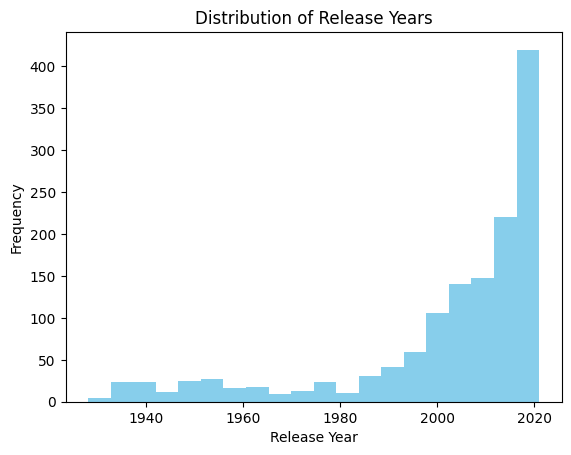

In [105]:
   # 1. What is the distribution of the release years for Disney Plus content?
   plt.hist(data['release_year'], bins=20, color='skyblue')
   plt.title("Distribution of Release Years")
   plt.xlabel("Release Year")
   plt.ylabel("Frequency")
   plt.show()

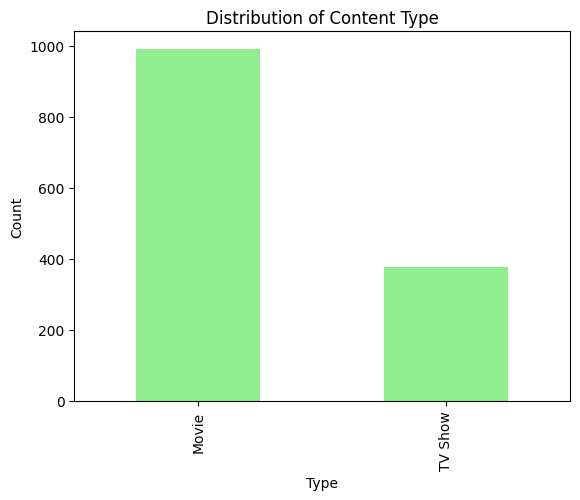

In [106]:
   # 2. How is the content distributed between movies and TV shows?   
   data['type'].value_counts().plot(kind='bar', color='lightgreen')
   plt.title("Distribution of Content Type")
   plt.xlabel("Type")
   plt.ylabel("Count")
   plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9956\1248147931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index, palette='Set2')


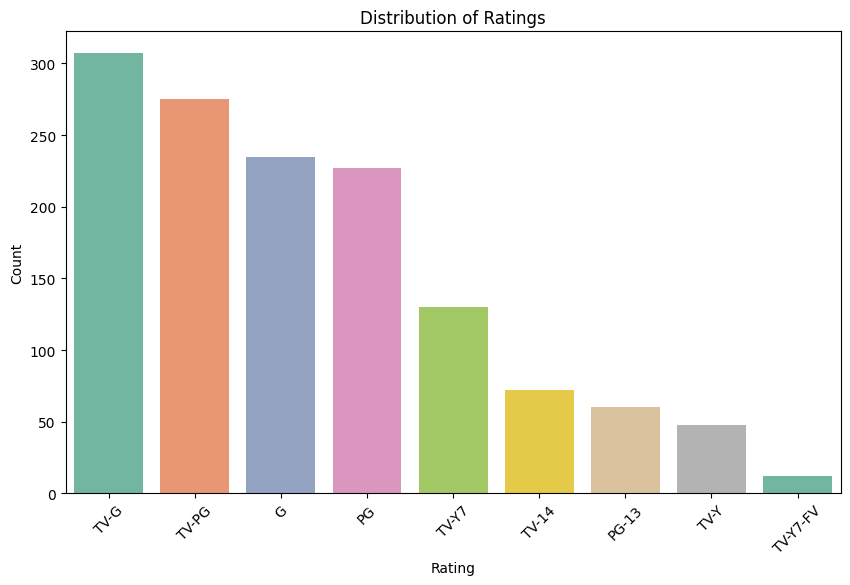

In [107]:
   # 3. What are the most common ratings for Disney Plus content?
   plt.figure(figsize=(10,6))
   sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index, palette='Set2')
   plt.title("Distribution of Ratings")
   plt.xlabel("Rating")
   plt.ylabel("Count")
   plt.xticks(rotation=45)
   plt.show()


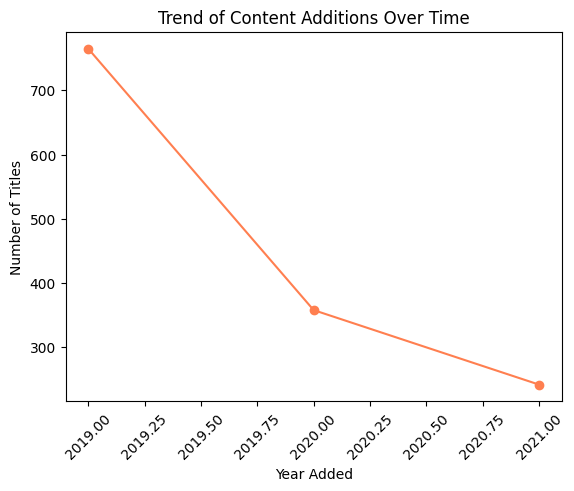

In [108]:
   # 4. What is the trend in content additions over time?
   data['year_added'] = data['date_added'].dt.year
   data['year_added'].value_counts().sort_index().plot(kind='line', marker='o', color='coral')
   plt.title("Trend of Content Additions Over Time")
   plt.xlabel("Year Added")
   plt.ylabel("Number of Titles")
   plt.xticks(rotation=45)
   plt.show()


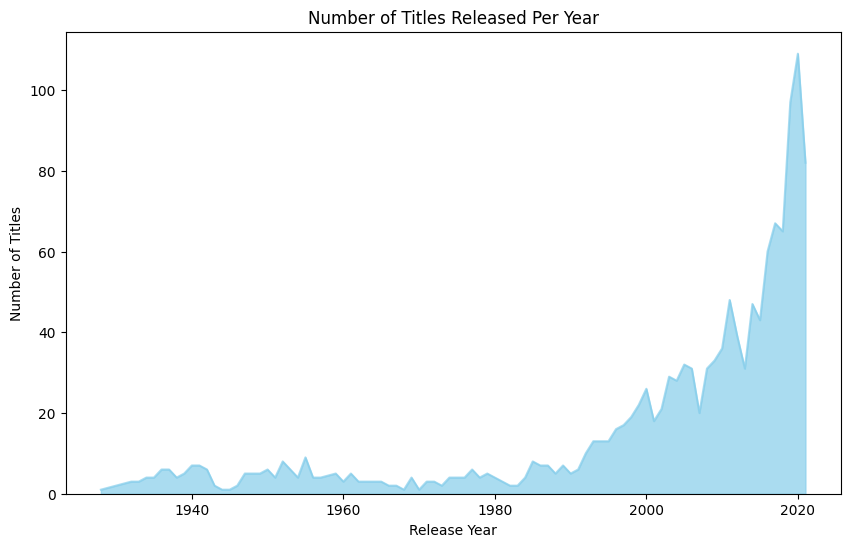

In [110]:
# 5. How has the number of titles released each year changed over time?
titles_per_year = data['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
titles_per_year.plot(kind='area', color='skyblue', alpha=0.7)
plt.title("Number of Titles Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()
